In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [30]:
data = pd.read_csv('../HW2/complete.csv', usecols=[0, 2, 3, 4, 5, 8, 9, 10], low_memory=False)
data.fillna(0)

,datetime,state,country,shape,duration (seconds),date posted,latitude,longitude
0,10/10/1949 20:30,tx,us,cylinder,2700,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,tx,0,light,7200,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,0,gb,circle,20,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,tx,us,circle,20,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,hi,us,light,900,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...
88870,9/9/2013 22:00,ca,us,other,1200,9/30/2013,38.2972222,-122.284444
88871,9/9/2013 22:20,va,us,circle,5,9/30/2013,38.9011111,-77.265556
88872,9/9/2013 23:00,ok,us,cigar,1020,9/30/2013,35.6527778,-97.477778
88873,9/9/2013 23:00,sc,us,diamond,0,9/30/2013,34.3769444,-82.695833


надо 

1) построить распределение по секундам, посчитать какая длина обычно встречается

2) построить график формы - столбики

3) понять в какой сране чаще (распределение), в каком штате сша чаще (распределение)

4) разместить точечки на карте - подумать с чем может быть связано

5) в каком месяце и в какое время обычно видят

In [31]:
ufo_date = data.datetime.str.replace('24:00', '00:00')  # clean illegal values
ufo_date = pd.to_datetime(ufo_date, format='%m/%d/%Y %H:%M')  # now in datetime

data['datetime'] = data.datetime.str.replace('24:00', '00:00')
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y %H:%M')

In [32]:
data

,datetime,state,country,shape,duration (seconds),date posted,latitude,longitude
0,1949-10-10 20:30:00,tx,us,cylinder,2700,4/27/2004,29.8830556,-97.941111
1,1949-10-10 21:00:00,tx,NaN,light,7200,12/16/2005,29.38421,-98.581082
2,1955-10-10 17:00:00,NaN,gb,circle,20,1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,tx,us,circle,20,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,hi,us,light,900,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...
88870,2013-09-09 22:00:00,ca,us,other,1200,9/30/2013,38.2972222,-122.284444
88871,2013-09-09 22:20:00,va,us,circle,5,9/30/2013,38.9011111,-77.265556
88872,2013-09-09 23:00:00,ok,us,cigar,1020,9/30/2013,35.6527778,-97.477778
88873,2013-09-09 23:00:00,sc,us,diamond,0,9/30/2013,34.3769444,-82.695833


# Где люди чаще видят нло

# 1) По странам

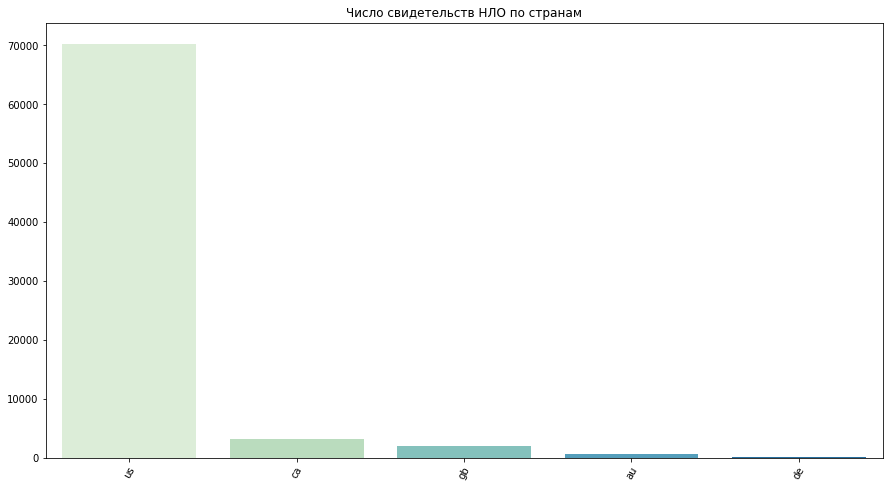

In [33]:
ufo_country = data["country"]

# задаем данные для осей
country_data = ufo_country.value_counts()
country_index = country_data.index
country_values = country_data.to_numpy()

# делаем столбчатую диаграму
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Число свидетельств НЛО по странам')

country_plot = sns.barplot(x=country_index, y=country_values, palette = "GnBu")

Подавляющее большинство данных из Америки. Далее можно рассмотреть статистику по штатам.

# 2) По штатам

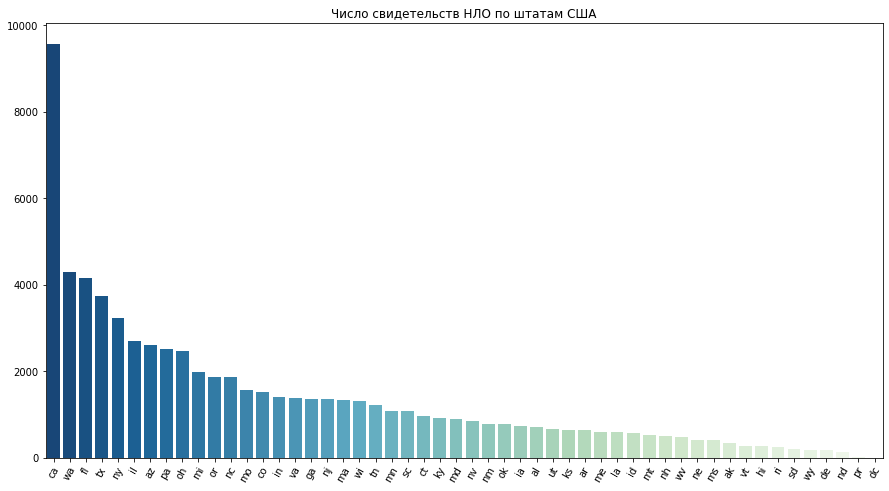

In [34]:
usa_filter = data['country']=='us'
us_data = data[usa_filter]

# задаем данные для осей
states_sights = us_data.state.value_counts()
state_names = states_sights.index
state_freq = states_sights.to_numpy()

# делаем столбчатую диаграму
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Число свидетельств НЛО по штатам США')
states_plot = sns.barplot(x=state_names,y=state_freq, palette="GnBu_r")
plt.show()

In [35]:
print('Top 10 States for Total UFO Sightings:')
print(states_sights[:10].sort_values(ascending=False))

Top 10 States for Total UFO Sightings:
ca    9575
wa    4292
fl    4155
tx    3742
ny    3234
il    2698
az    2617
pa    2520
oh    2464
mi    1980
Name: state, dtype: int64


Большинство данных получено из Калифорнии

# Какой формы обычно встречаются нло

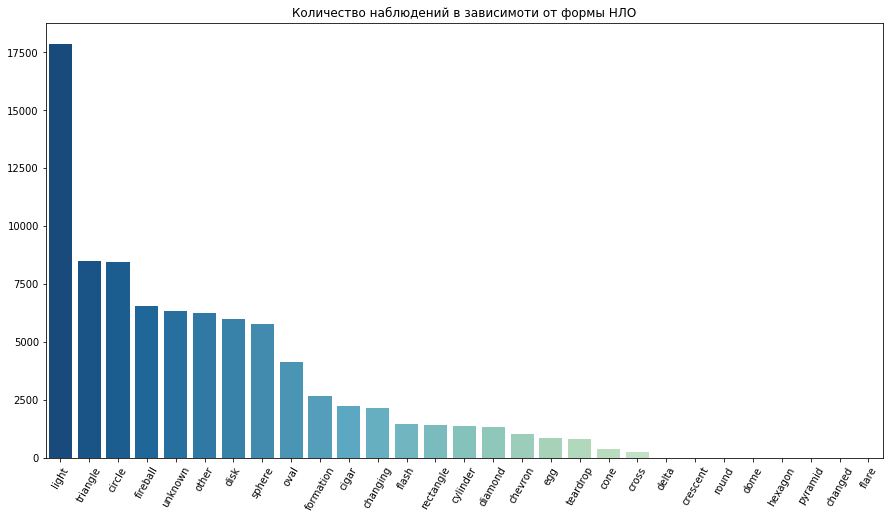

In [46]:
# задаем данные для осей
shape_sights = data['shape'].value_counts()
shape_names = shape_sights.index
shape_freq = shape_sights.to_numpy()

# делаем столбчатую диаграму
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Количество наблюдений в зависимоти от формы НЛО')
shape_plot = sns.barplot(x=shape_names,y=shape_freq, palette="GnBu_r")
plt.show()

In [38]:
# посмотрим на топ-3 форм по каждой стране
top_3_shapes_of_each_country = pd.DataFrame(data.groupby('country')['shape'].value_counts().groupby(level=0).head(3))
top_3_shapes_of_each_country.columns = ['Count']
top_3_shapes_of_each_country

Count
country shape          
au      light       123
        circle       68
        disk         62
ca      light       706
        circle      308
        triangle    292
de      light        24
        circle       10
        fireball     10
gb      light       389
        circle      259
        triangle    182
us      light     14268
        triangle   6952
        circle     6650

Видно, что чаще всего независимо от страны люди видят свет, напоминающий корабль инопланетян. Так же во всех странах часто встречаются круглые нло. 

# В какое время чаще всего видят нло

# 1) Распределение по годам

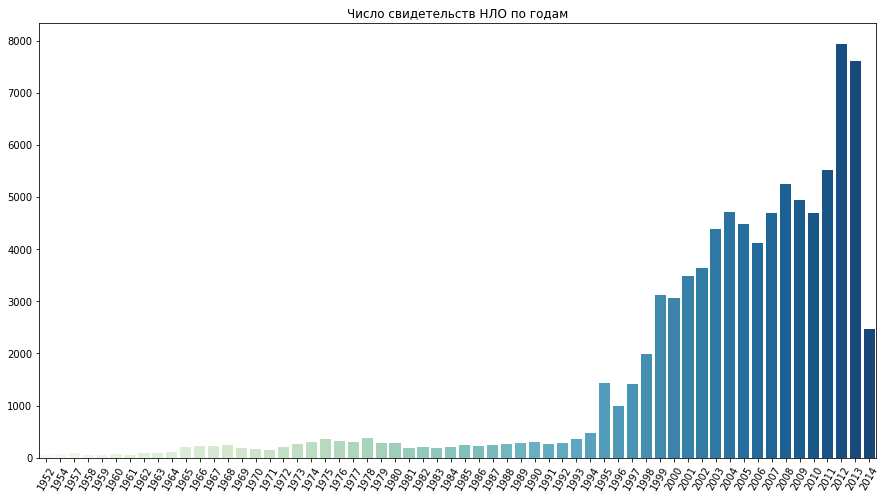

In [18]:
ufo_yr = ufo_date.dt.year 

years_data = ufo_yr.value_counts()
years_index = years_data.index
years_values = years_data.to_numpy()

plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Число свидетельств НЛО по годам')

years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "GnBu")

Чаще всего люди видели НЛО в 2012 и 2013 годах. Мне кажется, такая тенденция к росту с начале 2000х обусловлена появлением интернета и различных медиа, несущих фантастику и фентези в массы. Больше людей уже видели в фильмах или читали в книгах про НЛО, поэтому могут быть склонны объяснять сомнительные явления именно так.

# 2) Время года

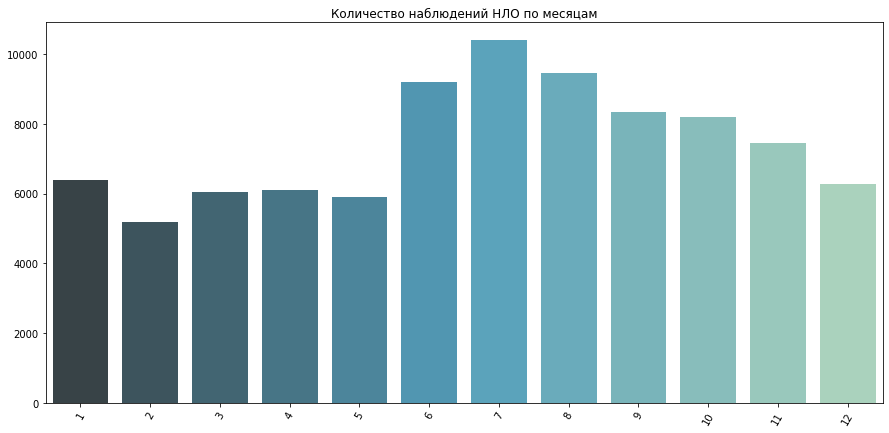

In [50]:
mon = data['datetime'].dt.month

mons_cts = mon.value_counts().sort_index()
mons_in = mons_cts.index
mons_val = mons_cts.to_numpy()

plt.figure(figsize=(15,7))
plt.xticks(rotation = 60)
plt.title('Количество наблюдений НЛО по месяцам')
sns.barplot(x=mons_in,y=mons_val, palette="GnBu_d")
plt.show()

Чаще всего НЛО появляются в июне, июле и августе. Мне кажется, это может быть связано с несколькими вещами. Во-первых, летом многие люди едут в отпуска или на отдых, выбираются на природу. Очевидно при этом повышается вероятность что-либо увидеть, поскольку исчезает сильная концентрация на работе. Во-вторых, летом часто жарко, поэтому тепловые флуктуации воздуха могут приводить к появлению иллюзий различного характера.  Так же летом обычно меньше осадков, чем в другие времена года, поэтому поле зрения увеличивается, летом можно увидеть даже очень далекий объект.